In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [67]:
X, y = make_blobs(centers=6, random_state=42)

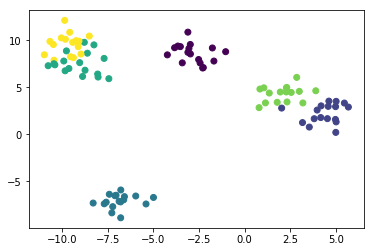

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [69]:
class CustomLogisticReg:
    
    def __init__(self, lr=.1, max_iters=50):
        self.lr = lr
        self.max_iters = max_iters
        
    def fit(self, X, y):
        
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        self.classes = np.unique(y)
        
        thetas = []
        
        for klass in self.classes:
            
            y_mod = (y==klass).astype(int)
            
            theta = np.random.randn(X.shape[1], 1)
            for i in range(self.max_iters):
                theta = self.gradient_accend(X, y_mod, theta)
            
            thetas.append(theta)
            
        self.thetas = np.hstack(thetas)
            
            
    def gradient_accend(self, X, y, theta):
        delta_theta = self.gradient(X, y, theta)
        theta += delta_theta
        return theta
        
    def gradient(self, X, y, theta):
        ya = y.reshape(-1, 1)
        yp = self.hypo(X, theta)
        
        diff = (yp-ya)
        dlltheta = np.dot(X.T, diff)/len(X)
        
        return -dlltheta * self.lr
        
    def hypo(self, X, theta):
        g = np.dot(X, theta)
        return 1 / (1 + np.exp(-g))
    
    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        result = self.hypo(X, self.thetas)
        return result
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        result = self.hypo(X, self.thetas)
        return result.argmax(axis=1)
    
    def score(self, X, y):
        yp = self.predict(X)
        return (yp==y).mean()

    

In [70]:
model = CustomLogisticReg()

In [71]:
model.fit(X, y)

In [72]:
model.thetas

array([[ 0.48013055,  0.43698368,  0.39806312, -2.55250857,  0.03170209,
        -1.47627047],
       [ 0.17020152,  1.15720632, -0.29347865, -0.19220877,  0.29564314,
        -0.08349877],
       [-0.03423423, -0.78242235, -1.02318373,  0.04725808, -0.10614484,
         0.04257483]])

In [73]:
model.predict(X[:10])

array([5, 3, 0, 3, 5, 2, 1, 1, 1, 0])

In [74]:
y[:10]

array([3, 5, 0, 5, 3, 2, 1, 1, 1, 0])

In [75]:
model.score(X, y)

0.65